# REAL TIME DESPATCH ANALYSE BETWEEN 2020 AND 2023

Our company managers are tasked with predicting their daily despatched tons for upto one year in advance.

Our company dealing on moreover 100 customers in several states and several countries.


In [1]:
#Data preprossing dataset
#importing libreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from datetime import date

In [3]:
data1 = pd.read_csv('Despatch_20-23.csv')

In [4]:
data1

,OD,ID,THICK,LENGTH1,ITEM CODE,CUSTOMER,CELL,ORD_NO,JOB NO,DELIVERY_NO,INVOICE_NO,INVOICE_DATE,Month_of_the_year,NOS,MTRS,TONS
0,15.75,10.13,NaN,3700.0,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19708353,PAH-STN-7469,23-Sep-20,9,0,1705.96,1.52
1,15.75,10.13,NaN,3700.0,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19715532,PAH-STN-7486,27-Sep-20,9,0,927.66,0.83
2,15.75,10.13,NaN,3700.0,3D0201128255024T,PWH,LDC,143576,ANE20CB01575D01,19904415,PAH-STN-7888,31-Dec-20,12,0,367.25,0.33
3,38.10,0.00,1.6,3000.0,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19714841,PAH-STN-7485,26-Sep-20,9,332,997.43,1.44
4,38.10,0.00,1.6,3000.0,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19724246,PAH-STN-7512,30-Sep-20,9,207,620.10,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74208,38.00,27.00,NaN,4330.0,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502454,PAH-STN-11365,31-Aug-23,8,186,805.38,3.61
74209,38.00,27.00,NaN,4330.0,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502609,PAH-STN-11366,31-Aug-23,8,1,4.33,0.02
74210,38.00,27.00,NaN,4330.0,3D0268128255219T,PWH,HDC,213426,ANH238B03800008,22502609,PAH-STN-11366,31-Aug-23,8,599,2593.67,11.64
74211,38.00,27.00,NaN,4330.0,3D0268128255219T,PWH,HDC,214637,ANH238B03800008,22513579,PAH-STN-11389,06-Sep-23,9,105,454.65,2.04


In [5]:
#Removing unwanted columns
data1 = pd.read_csv('despatch_20-23.csv')
unwanted_columns = ['OD','ID','THICK','LENGTH1']
data1 = data1.drop(columns= unwanted_columns)
data1.head()


,ITEM CODE,CUSTOMER,CELL,ORD_NO,JOB NO,DELIVERY_NO,INVOICE_NO,INVOICE_DATE,Month_of_the_year,NOS,MTRS,TONS
0,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19708353,PAH-STN-7469,23-Sep-20,9,0,1705.96,1.52
1,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19715532,PAH-STN-7486,27-Sep-20,9,0,927.66,0.83
2,3D0201128255024T,PWH,LDC,143576,ANE20CB01575D01,19904415,PAH-STN-7888,31-Dec-20,12,0,367.25,0.33
3,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19714841,PAH-STN-7485,26-Sep-20,9,332,997.43,1.44
4,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19724246,PAH-STN-7512,30-Sep-20,9,207,620.10,0.89


In [6]:
data1

,ITEM CODE,CUSTOMER,CELL,ORD_NO,JOB NO,DELIVERY_NO,INVOICE_NO,INVOICE_DATE,Month_of_the_year,NOS,MTRS,TONS
0,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19708353,PAH-STN-7469,23-Sep-20,9,0,1705.96,1.52
1,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19715532,PAH-STN-7486,27-Sep-20,9,0,927.66,0.83
2,3D0201128255024T,PWH,LDC,143576,ANE20CB01575D01,19904415,PAH-STN-7888,31-Dec-20,12,0,367.25,0.33
3,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19714841,PAH-STN-7485,26-Sep-20,9,332,997.43,1.44
4,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19724246,PAH-STN-7512,30-Sep-20,9,207,620.10,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
74208,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502454,PAH-STN-11365,31-Aug-23,8,186,805.38,3.61
74209,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502609,PAH-STN-11366,31-Aug-23,8,1,4.33,0.02
74210,3D0268128255219T,PWH,HDC,213426,ANH238B03800008,22502609,PAH-STN-11366,31-Aug-23,8,599,2593.67,11.64
74211,3D0268128255219T,PWH,HDC,214637,ANH238B03800008,22513579,PAH-STN-11389,06-Sep-23,9,105,454.65,2.04


# Exploratory Data Analysis and Visualization

1.Cleaning the Data

The first step is the check the coloumn data types and identify if there are any null values or any duplicate values.

Missing data includes None, Null. When we are dealing with missing values using pandas, we dont need in diffrentiate them because Pandas use
Nan internally for simplicity, However , its better to have a deeper understanding of it.

-> NaN - Not a Number

NaN is a meaning of floating point value that is part of the IEEE floating point specification.

-> None - A Python Object

None is a python Object called NoneType

-> Null - Python uses None inplace of Null

Null is a value which you can use when you yourself want assign a empty value to a variable.

# Basic Guidence

Gather insights about the problem and the dataset.

Study the distributions of individual columns.

Detect missing or incorrect values.

Study the relationship of target column with other columns.(linear or non-linear).

Basically, come up with ideas for preprocessing and feature engineering.


In [7]:
#Its displays a summary of the dataset , including the number of the rows and coloumns
#the coloumn names and the data types of each coloumn
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74213 entries, 0 to 74212
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITEM CODE          74213 non-null  object 
 1   CUSTOMER           74213 non-null  object 
 2   CELL               74213 non-null  object 
 3   ORD_NO             74213 non-null  int64  
 4   JOB NO             74177 non-null  object 
 5   DELIVERY_NO        74213 non-null  int64  
 6   INVOICE_NO         74213 non-null  object 
 7   INVOICE_DATE       74213 non-null  object 
 8   Month_of_the_year  74213 non-null  int64  
 9   NOS                74213 non-null  int64  
 10  MTRS               74213 non-null  float64
 11  TONS               74213 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 6.8+ MB


In [8]:
data1.dropna(inplace=True)
data1.isna().sum()


ITEM CODE            0
CUSTOMER             0
CELL                 0
ORD_NO               0
JOB NO               0
DELIVERY_NO          0
INVOICE_NO           0
INVOICE_DATE         0
Month_of_the_year    0
NOS                  0
MTRS                 0
TONS                 0
dtype: int64

In [9]:
data1

,ITEM CODE,CUSTOMER,CELL,ORD_NO,JOB NO,DELIVERY_NO,INVOICE_NO,INVOICE_DATE,Month_of_the_year,NOS,MTRS,TONS
0,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19708353,PAH-STN-7469,23-Sep-20,9,0,1705.96,1.52
1,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19715532,PAH-STN-7486,27-Sep-20,9,0,927.66,0.83
2,3D0201128255024T,PWH,LDC,143576,ANE20CB01575D01,19904415,PAH-STN-7888,31-Dec-20,12,0,367.25,0.33
3,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19714841,PAH-STN-7485,26-Sep-20,9,332,997.43,1.44
4,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19724246,PAH-STN-7512,30-Sep-20,9,207,620.10,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
74208,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502454,PAH-STN-11365,31-Aug-23,8,186,805.38,3.61
74209,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502609,PAH-STN-11366,31-Aug-23,8,1,4.33,0.02
74210,3D0268128255219T,PWH,HDC,213426,ANH238B03800008,22502609,PAH-STN-11366,31-Aug-23,8,599,2593.67,11.64
74211,3D0268128255219T,PWH,HDC,214637,ANH238B03800008,22513579,PAH-STN-11389,06-Sep-23,9,105,454.65,2.04


In [10]:
#Checking Duplicate data


print("There are",data1.duplicated().sum(),"duplicate data")

There are 0 duplicate data


In [11]:
#Parsing the date coloumn
data1['INVOICE_DATE'] = pd.to_datetime(data1['INVOICE_DATE'])

In [12]:
data1.INVOICE_DATE.min(), data1.INVOICE_DATE.max()

(Timestamp('2020-01-02 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [13]:
data1['INVOICE_DATE'] = pd.to_datetime(data1.INVOICE_DATE)
data1.INVOICE_DATE.min(),data1.INVOICE_DATE.max()

(Timestamp('2020-01-02 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [14]:
df=pd.DataFrame(data1)
values_counts_result=df['CELL'].value_counts()
print(values_counts_result)

HDC    37723
LDC    23912
ODC     6688
FFC     5854
Name: CELL, dtype: int64


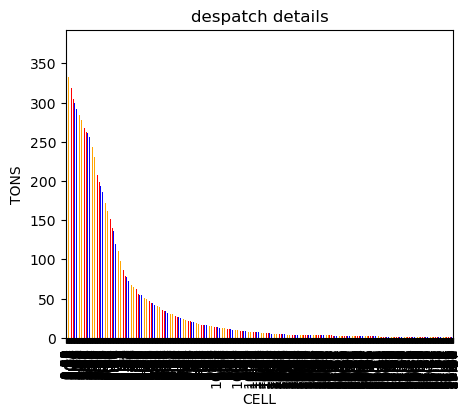

In [15]:
df=pd.DataFrame(data1)
values_counts_result=df['TONS'].value_counts()
plt.figure(figsize=(5,4))
values_counts_result.plot(kind='bar', color=['red','blue','orange'])
plt.title('despatch details')
plt.xlabel('CELL')
plt.ylabel('TONS')
plt.show()

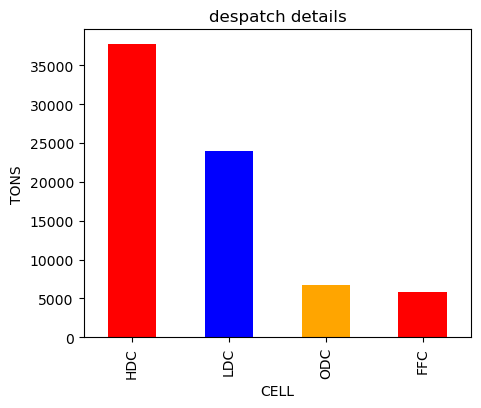

In [16]:
df=pd.DataFrame(data1)
values_counts_result=df['CELL'].value_counts()
plt.figure(figsize=(5,4))
values_counts_result.plot(kind='bar', color=['red','blue','orange'])
plt.title('despatch details')
plt.xlabel('CELL')
plt.ylabel('TONS')
plt.show()

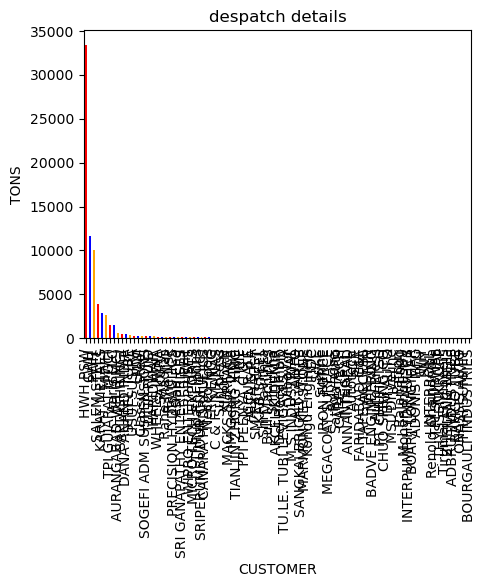

In [17]:
df=pd.DataFrame(data1)
values_counts_result=df['CUSTOMER'].value_counts()
plt.figure(figsize=(5,4))
values_counts_result.plot(kind='bar', color=['red','blue','orange'])
plt.title('despatch details')
plt.xlabel('CUSTOMER')
plt.ylabel('TONS')
plt.show()

<Axes: xlabel='CUSTOMER', ylabel='TONS'>

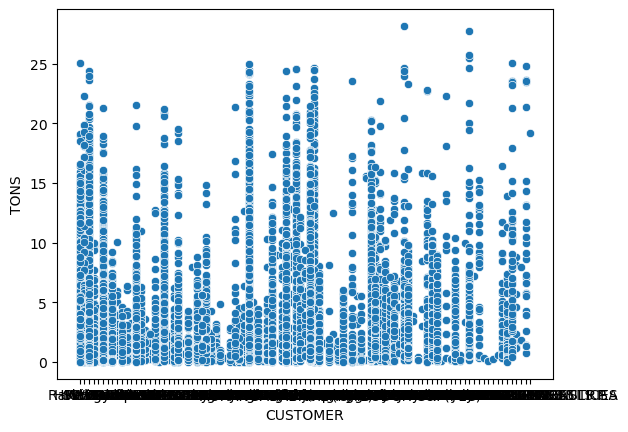

In [18]:

sns.scatterplot(x='CUSTOMER', y='TONS', data=data1)

Sales_Distribution

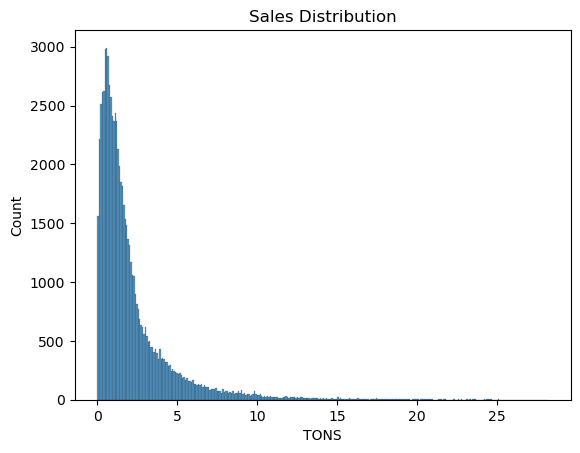

In [19]:

sns.histplot(data=data1, x='TONS')
plt.title('Sales Distribution')
plt.show()

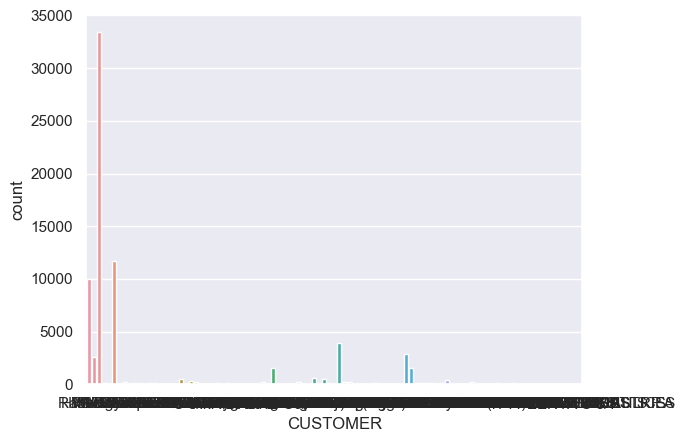

In [20]:
#Count Plot using Seaborn

df=pd.DataFrame(data1)

sns.set(style="darkgrid")

sns.countplot(x='CUSTOMER', data=data1)
plt.show()

In [21]:
data1.corr()['TONS'].sort_values(ascending=False)

C:\Users\Ganesh Raja\AppData\Local\Temp\ipykernel_13500\1481434363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()['TONS'].sort_values(ascending=False)


TONS                 1.000000
MTRS                 0.689892
NOS                  0.580466
ORD_NO               0.112589
DELIVERY_NO          0.025649
Month_of_the_year    0.003808
Name: TONS, dtype: float64

Per Day Despatch Tons vs Meters

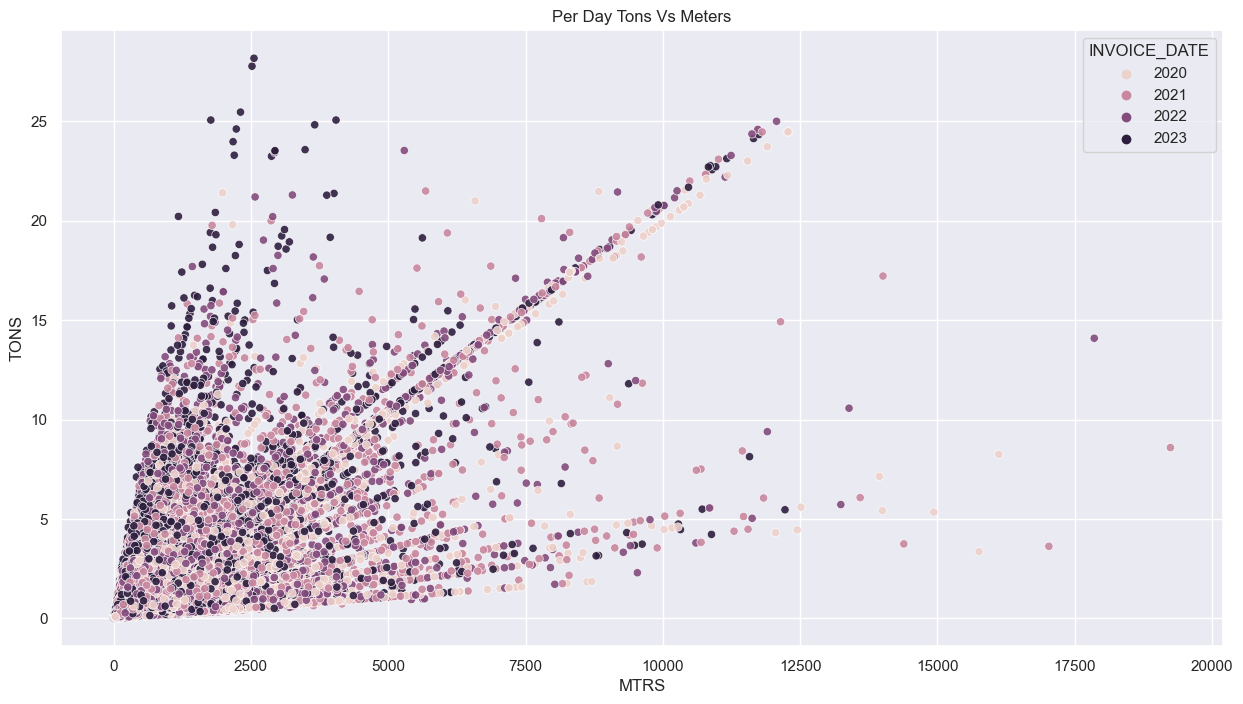

In [22]:
plt.figure(figsize=(15,8))
temp_df=data1.sample(50000)
sns.scatterplot(x=temp_df.MTRS,y=temp_df.TONS, hue=temp_df.INVOICE_DATE.dt.year, alpha=0.9,data=temp_df)
plt.title('Per Day Tons Vs Meters')
plt.show()

This plot represent:
    
There is a positive correlation between Tons and Meters. Hence Proved! The measurement of Tons is not dependent on the
Number of Meters, is dependent on the OD, ID, Thickness... The weight of a tube, and consequently its measurement in tons,
is dependent on factors such as the outer diameter(OD), inner diameter(ID), and wall thickness. 

Customers Vs Tons Per Day

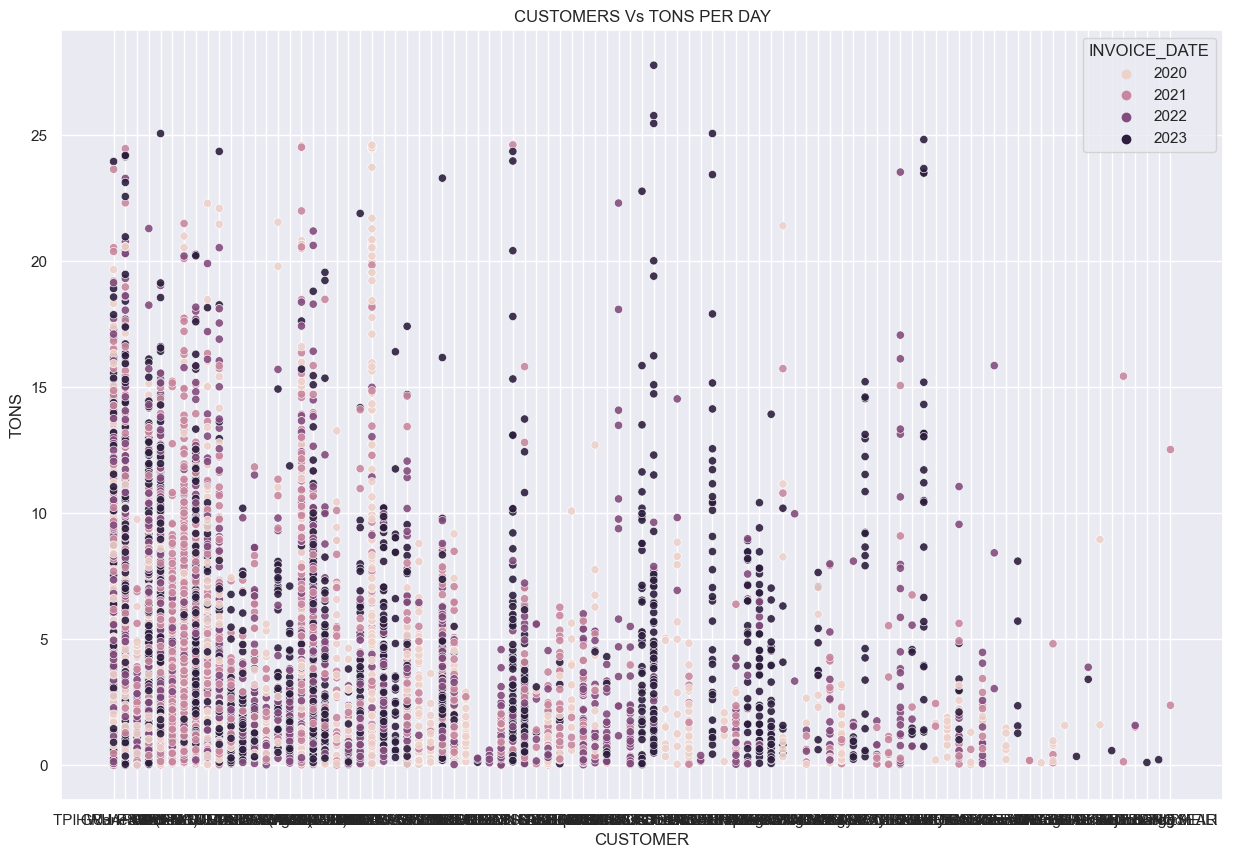

In [23]:
plt.figure(figsize=(15,10))
temp_df=data1.sample(50000)
sns.scatterplot(x=temp_df.CUSTOMER,y=temp_df.TONS, hue=temp_df.INVOICE_DATE.dt.year, alpha=0.9,data=temp_df)
plt.title('CUSTOMERS Vs TONS PER DAY')
plt.show()

Conclusion made on:
    
    * We have around more than 100 customers and each customers we have just plotted the sales tons based on particular days
    
    *Its really noisy, because of above 100 customers, but each verticle line represented a store.
    
    *The Tons may fluctuate based on a single customer(It can be high as well as low) on a certain day of despatch...

# Despatched Meters Vs Month of the Year

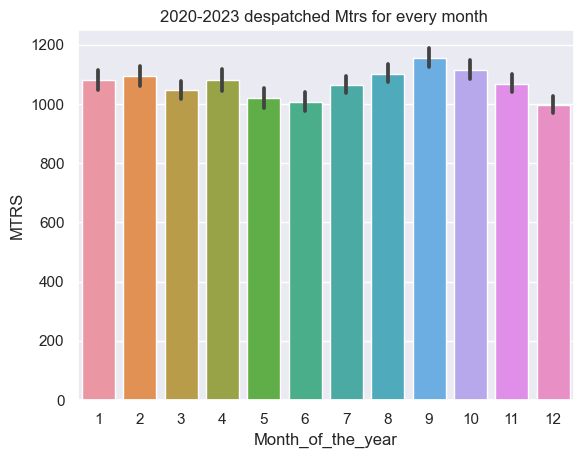

In [24]:
sns.barplot(data=data1,x="Month_of_the_year", y='MTRS')
plt.title('2020-2023 despatched Mtrs for every month ')
plt.show()

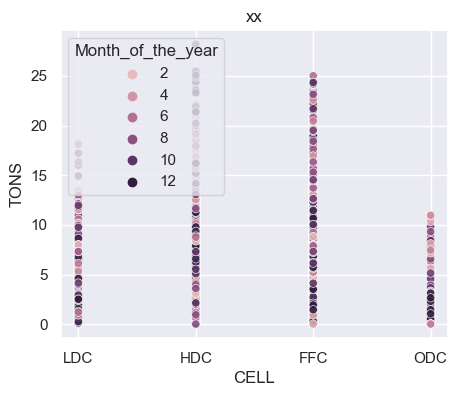

In [25]:
df=pd.DataFrame(data1)
values_counts_result=df['CELL'].value_counts()
sum_by_month = data1.groupby('Month_of_the_year')['TONS'].sum().reset_index()
values_counts_result=df['Month_of_the_year'].value_counts()
plt.figure(figsize=(5,4))
temp_df=data1.sample(50000)
sns.scatterplot(data=data1,x="CELL", y='TONS',hue=temp_df.Month_of_the_year,alpha=0.9)
plt.title('xx')
plt.show()

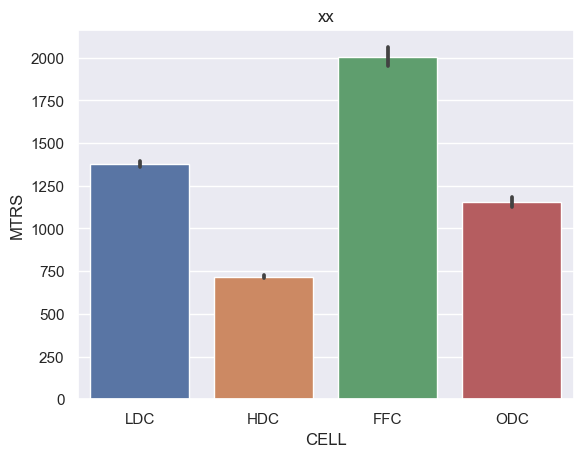

In [26]:
sns.barplot(data1, x='CELL', y='MTRS')
plt.title('xx')
plt.show()

In [27]:
data1["Month_of_the_year"].unique()

array([ 9, 12, 10, 11,  1,  2,  3,  6,  7,  8,  5,  4], dtype=int64)

In [28]:
month_mapping = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}


#Replace numerical values with month names
data1["Month_of_the_year"] = data1["Month_of_the_year"].replace(month_mapping)

data1

,ITEM CODE,CUSTOMER,CELL,ORD_NO,JOB NO,DELIVERY_NO,INVOICE_NO,INVOICE_DATE,Month_of_the_year,NOS,MTRS,TONS
0,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19708353,PAH-STN-7469,2020-09-23,Sep,0,1705.96,1.52
1,3D0201128255024T,PWH,LDC,136108,ANL209B01575001,19715532,PAH-STN-7486,2020-09-27,Sep,0,927.66,0.83
2,3D0201128255024T,PWH,LDC,143576,ANE20CB01575D01,19904415,PAH-STN-7888,2020-12-31,Dec,0,367.25,0.33
3,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19714841,PAH-STN-7485,2020-09-26,Sep,332,997.43,1.44
4,3D0201759055024T,MIWH,LDC,136109,ANL209A03810001,19724246,PAH-STN-7512,2020-09-30,Sep,207,620.10,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
74208,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502454,PAH-STN-11365,2023-08-31,Aug,186,805.38,3.61
74209,3D0268128255219T,PWH,HDC,211449,ANH238B03800008,22502609,PAH-STN-11366,2023-08-31,Aug,1,4.33,0.02
74210,3D0268128255219T,PWH,HDC,213426,ANH238B03800008,22502609,PAH-STN-11366,2023-08-31,Aug,599,2593.67,11.64
74211,3D0268128255219T,PWH,HDC,214637,ANH238B03800008,22513579,PAH-STN-11389,2023-09-06,Sep,105,454.65,2.04


In [29]:
data1['Day']=data1.INVOICE_DATE.dt.day
data1['Month']=data1.INVOICE_DATE.dt.month
data1['Year']=data1.INVOICE_DATE.dt.year

In [30]:
sum_by_month = data1.groupby('Month')['TONS'].sum().reset_index()


### We are using groupby , Groupby function in pandas is used for grouping rows of a Dataframe based on the values in one or more columns.
### It allows you to split the data into groups based on the some criteria and then apply a function to each group independently.

In [31]:
sum_by_month

,Month,TONS
0,1,10409.59
1,2,11408.83
2,3,13665.75
3,4,10978.89
4,5,10389.40
5,6,11867.74
6,7,13919.19
7,8,15233.71
8,9,15508.32
9,10,15293.37


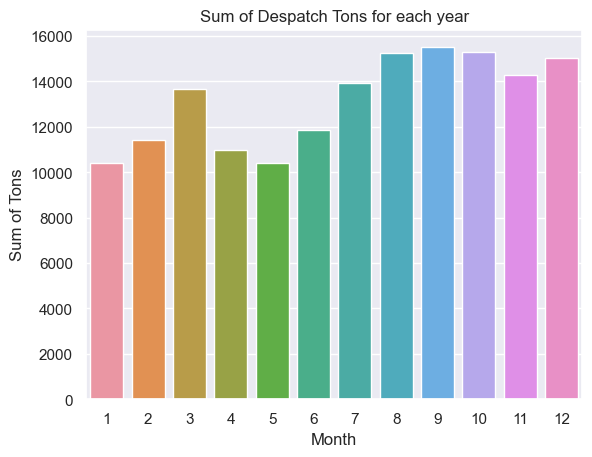

In [32]:
sns.barplot(x='Month', y='TONS', data=sum_by_month)
plt.xlabel('Month')
plt.ylabel('Sum of Tons')
plt.title('Sum of Despatch Tons for each year')
plt.show()

In [33]:
sum_by_year = data1.groupby('Year')['TONS'].sum().reset_index()

In [34]:
sum_by_year

,Year,TONS
0,2020,25228.91
1,2021,43640.65
2,2022,41485.55
3,2023,47665.72


Our Total despatch tons on every year

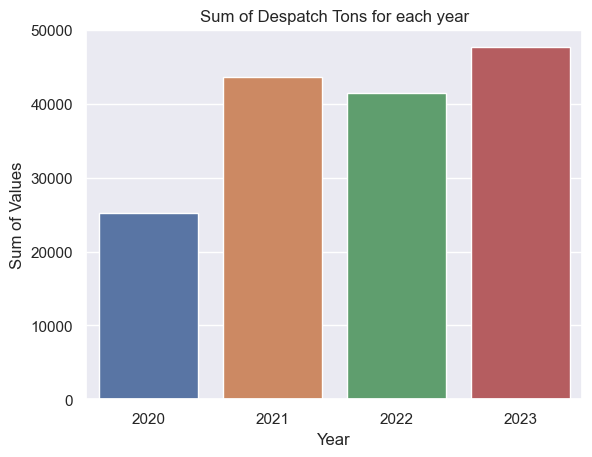

In [35]:
sns.barplot(x='Year', y='TONS', data=sum_by_year)
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Sum of Despatch Tons for each year')
plt.show()

Conclusion made are:
    
    *Our despatch is increasing Year by Year. This can be said between 2020 and 2023 is almost move on positive ratio..
    
    *This is good despatch analytical. and finally we are expect the maximum despatch to reach in 2024 year as well. 

In [36]:
len(data1)

74177

In [37]:
train_size = int(0.9 * len(data1))

In [38]:
train_size

66759

In [39]:
sorted_data = data1.sort_values('INVOICE_DATE')

train_df, val_df = sorted_data[:train_size], sorted_data[train_size:]

In [40]:
train_df.INVOICE_DATE.min(), train_df.INVOICE_DATE.max()

(Timestamp('2020-01-02 00:00:00'), Timestamp('2023-09-06 00:00:00'))

In [41]:
val_df.INVOICE_DATE.min(), val_df.INVOICE_DATE.max()

(Timestamp('2023-09-06 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [42]:
val_df.INVOICE_DATE.min()

Timestamp('2023-09-06 00:00:00')

In [43]:
train_df.columns

Index(['ITEM CODE', 'CUSTOMER', 'CELL', 'ORD_NO', 'JOB NO', 'DELIVERY_NO',
       'INVOICE_NO', 'INVOICE_DATE', 'Month_of_the_year', 'NOS', 'MTRS',
       'TONS', 'Day', 'Month', 'Year'],
      dtype='object')

In [44]:
input_cols = ['CUSTOMER', 'CELL','Month_of_the_year', 'NOS', 'MTRS', 'Day', 'Month', 'Year' ]


In [45]:
target_col = "TONS"

In [46]:
data1[input_cols].nunique()

CUSTOMER                97
CELL                     4
Month_of_the_year       12
NOS                   3001
MTRS                 36710
Day                     31
Month                   12
Year                     4
dtype: int64

In [47]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [48]:
train_inputs['CELL'].unique()

array(['HDC', 'LDC', 'ODC', 'FFC'], dtype=object)

In [49]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [50]:
test_inputs = data1[input_cols].copy()

#test data does not have targets

Note that some columns can be treated as both numeric and categorical and its up to you to decide how you want to deal with them

In [51]:
numeric_cols = ['NOS', 'MTRS', 'Day', 'Month', 'Year']
categorical_cols = ['CELL', 'CUSTOMER', 'Month_of_the_year']

In [52]:
numeric_cols

['NOS', 'MTRS', 'Day', 'Month', 'Year']

In [53]:
categorical_cols

['CELL', 'CUSTOMER', 'Month_of_the_year']

In [54]:
train_inputs

,CUSTOMER,CELL,Month_of_the_year,NOS,MTRS,Day,Month,Year
7429,HWH PSW,HDC,Jan,50,175.50,2,1,2020
341,HWH PSW,LDC,Jan,419,2095.00,2,1,2020
8090,PWH,ODC,Jan,514,2575.14,2,1,2020
353,HWH PSW,HDC,Jan,112,642.88,2,1,2020
4715,HWH PSW,HDC,Jan,61,335.50,2,1,2020
...,...,...,...,...,...,...,...,...
61560,CWH,HDC,Sep,40,180.00,6,9,2023
61238,CWH,LDC,Sep,131,491.25,6,9,2023
61559,CWH,HDC,Sep,56,252.00,6,9,2023
64714,PWH,ODC,Sep,301,1510.00,6,9,2023


# Imputations , Scaling, Encode

Lets impute missing data from numeric columns

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])
imputer = SimpleImputer(strategy='mean').fit(test_inputs[numeric_cols])

In [57]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [58]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [60]:
train_inputs.columns

Index(['CUSTOMER', 'CELL', 'Month_of_the_year', 'NOS', 'MTRS', 'Day', 'Month',
       'Year'],
      dtype='object')

In [61]:
train_inputs[numeric_cols]

,NOS,MTRS,Day,Month,Year
7429,50.0,175.50,2.0,1.0,2020.0
341,419.0,2095.00,2.0,1.0,2020.0
8090,514.0,2575.14,2.0,1.0,2020.0
353,112.0,642.88,2.0,1.0,2020.0
4715,61.0,335.50,2.0,1.0,2020.0
...,...,...,...,...,...
61560,40.0,180.00,6.0,9.0,2023.0
61238,131.0,491.25,6.0,9.0,2023.0
61559,56.0,252.00,6.0,9.0,2023.0
64714,301.0,1510.00,6.0,9.0,2023.0


In [62]:
train_inputs[categorical_cols]

,CELL,CUSTOMER,Month_of_the_year
7429,HDC,HWH PSW,Jan
341,LDC,HWH PSW,Jan
8090,ODC,PWH,Jan
353,HDC,HWH PSW,Jan
4715,HDC,HWH PSW,Jan
...,...,...,...
61560,HDC,CWH,Sep
61238,LDC,CWH,Sep
61559,HDC,CWH,Sep
64714,ODC,PWH,Sep


Finally lets encode categorical columns as one-hot vectors.

In [63]:
#dummy_data = pd.get_dummies(train_inputs['CUSTOMER', 'CELL', 'Month_of_the_year', 'NOS', 'MTRS', 'Day', 'Month','Year'])
#dummy_data.head()

In [64]:
train_inputs[categorical_cols].nunique()

CELL                  4
CUSTOMER             91
Month_of_the_year    12
dtype: int64

In [65]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [66]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Ganesh Raja\AppData\Local\Temp\ipykernel_13500\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Ganesh Raja\AppData\Local\Temp\ipykernel_13500\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Ganesh Raja\AppData\Local\Temp\ipykernel_13500\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usua

In [67]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [68]:
def return_mean(inputs):
    return np.full(len(inputs), data1.TONS.mean())


In [69]:
train_preds = return_mean(X_train)
train_preds

array([2.13032112, 2.13032112, 2.13032112, ..., 2.13032112, 2.13032112,
       2.13032112])

In [70]:
from sklearn.metrics import mean_squared_error
print("Train RMSE :", (mean_squared_error(train_preds, train_targets,squared=False)))
print("Validation RMSE :",(mean_squared_error(return_mean(X_val),val_targets,squared=False)))

Train RMSE : 2.459016788235665
Validation RMSE : 2.94701841562247


This model is off about 2.5 Tons an average


Lets by trying another model

# Linear Models

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

We have fit the model already, the model can now be used to make predictions.

Lets define a fuction try_model, which takes a model , then performs training and evaluation

In [72]:
def try_model(model):
    
    #Fit the model
    model.fit(X_train, train_targets)
    
    #Generate Predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    #Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, train_targets)

LinearRegression()

In [74]:
model.score(X_train, train_targets)*100

68.09547785812283

In [75]:
print("LinearRegression RMSE:", (try_model(LinearRegression())))


LinearRegression RMSE: (1.3888148348257097, 1.8962797892787893)


# Decision Tree Model

In [76]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


sample = DecisionTreeRegressor(random_state = 42)
try_model(sample)

(0.009636487237966531, 1.8404604272082865)

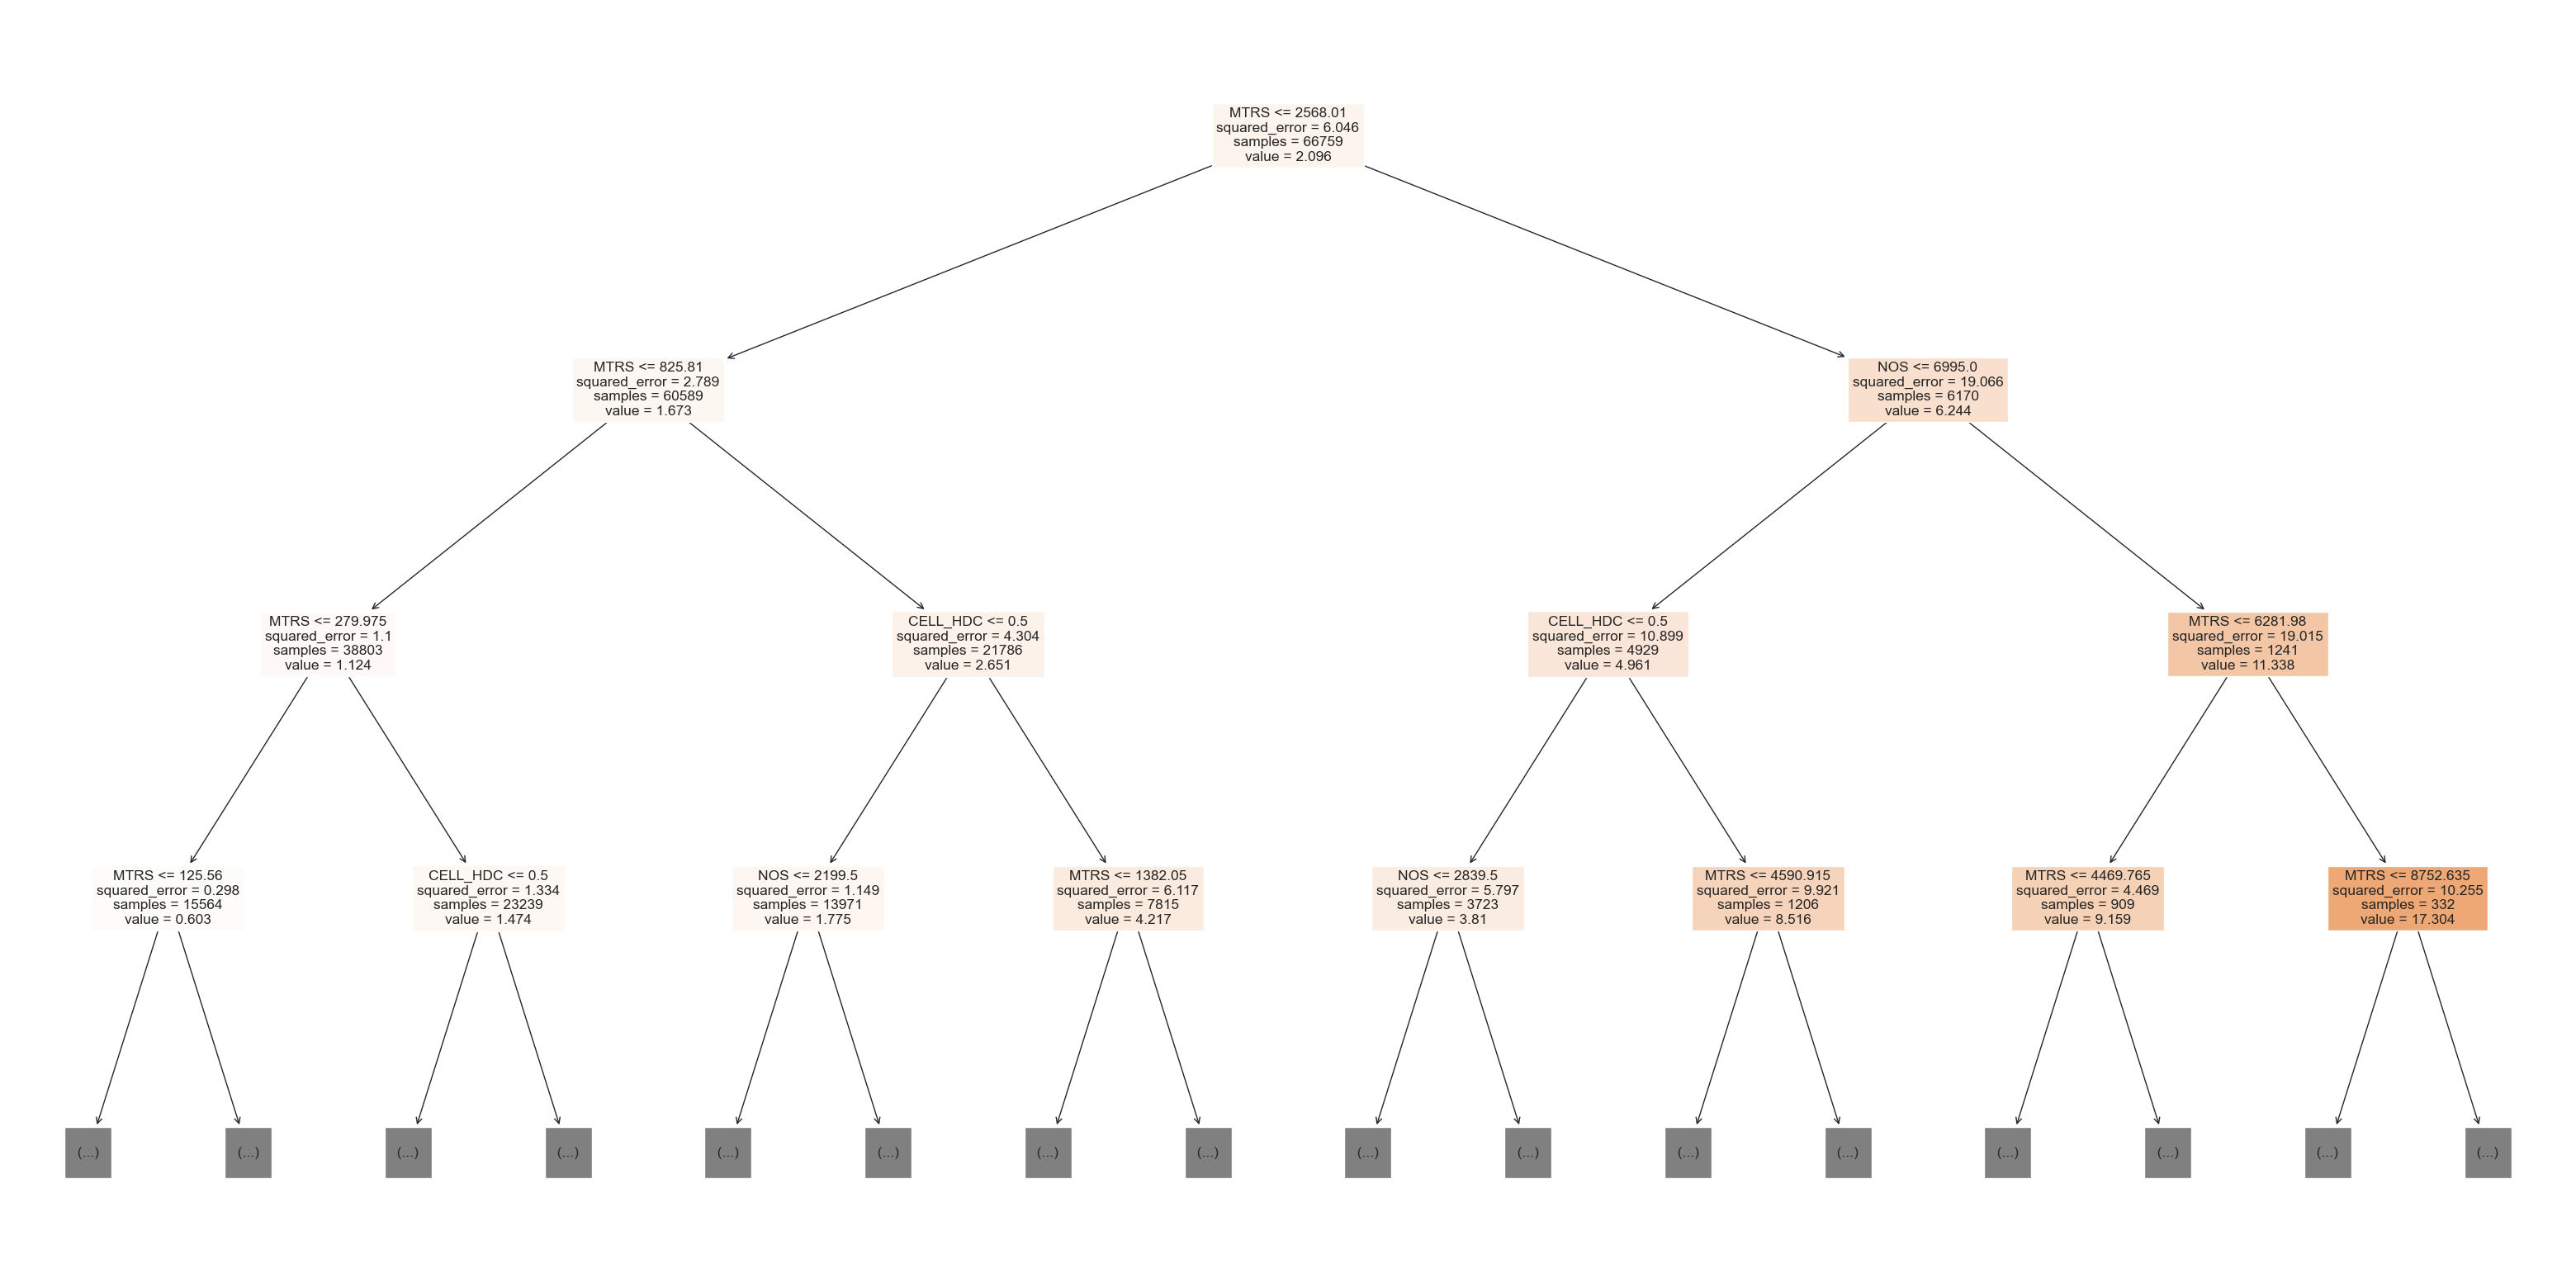

In [77]:
plt.figure(figsize=(40, 20))
plot_tree(sample, max_depth = 3, filled = True, feature_names= numeric_cols+encoded_cols);

# Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor

sample1 = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(sample1)

(0.3438275931349083, 1.4400548333440093)

In [79]:
from sklearn.ensemble import RandomForestRegressor

sample1 = RandomForestRegressor(random_state=42, n_estimators=100)
try_model(sample1)

(0.3438275931349083, 1.4400548333440095)

We've seen a significant reduction in the loss by using a random forest.

In [80]:
X_train.columns

Index(['NOS', 'MTRS', 'Day', 'Month', 'Year', 'CELL_FFC', 'CELL_HDC',
       'CELL_LDC', 'CELL_ODC', 'CUSTOMER_A.R. AUTO',
       ...
       'Month_of_the_year_Dec', 'Month_of_the_year_Feb',
       'Month_of_the_year_Jan', 'Month_of_the_year_Jul',
       'Month_of_the_year_Jun', 'Month_of_the_year_Mar',
       'Month_of_the_year_May', 'Month_of_the_year_Nov',
       'Month_of_the_year_Oct', 'Month_of_the_year_Sep'],
      dtype='object', length=112)

In [81]:
sample1.feature_importances_

array([1.35303247e-01, 5.51367424e-01, 2.19333009e-02, 9.97337424e-03,
       9.81134295e-03, 4.22065291e-03, 1.33382035e-01, 2.59506063e-02,
       9.88532667e-03, 3.68473380e-06, 6.99855241e-05, 8.01163279e-05,
       3.11546712e-04, 1.18732897e-06, 5.91336782e-05, 1.53640709e-03,
       6.72758717e-04, 1.78957083e-06, 2.89961237e-05, 1.63262323e-07,
       2.48837323e-04, 4.38330067e-04, 1.49017352e-03, 3.22003157e-04,
       2.28280878e-05, 5.69945112e-08, 7.90411085e-03, 2.23572445e-04,
       9.80233592e-03, 5.19458687e-06, 2.21580942e-06, 3.00351672e-05,
       1.58804541e-02, 2.29357454e-05, 4.87331601e-06, 2.38740796e-06,
       4.47985404e-04, 7.92904297e-07, 5.57369800e-08, 1.39232512e-03,
       3.03758531e-03, 1.59501158e-03, 2.07696517e-03, 2.40910537e-05,
       1.80580197e-08, 2.16682298e-05, 7.58241459e-09, 3.22638245e-03,
       3.57428135e-03, 2.29342804e-04, 2.48397266e-04, 1.50359673e-04,
       3.56605277e-10, 5.12265729e-07, 1.42586227e-03, 1.40099613e-08,
      

In [82]:
importance_df= pd.DataFrame({
    'feature': numeric_cols+encoded_cols,'importance': sample1.feature_importances_}).sort_values('importance', ascending=False)
importance_df

,feature,importance
1,MTRS,5.513674e-01
0,NOS,1.353032e-01
6,CELL_HDC,1.333820e-01
7,CELL_LDC,2.595061e-02
2,Day,2.193330e-02
...,...,...
46,CUSTOMER_MEGACOAT SURFACE,7.582415e-09
68,CUSTOMER_SANGKAJ BRIGHT WIRES,5.537867e-09
99,CUSTOMER_ZHEJIANG MEILI,1.657556e-09
91,CUSTOMER_Tirumal Engineers,1.024769e-09


In [83]:
importance_df.head(10)

,feature,importance
1,MTRS,0.551367
0,NOS,0.135303
6,CELL_HDC,0.133382
7,CELL_LDC,0.025951
2,Day,0.021933
32,CUSTOMER_HWH PSW,0.015880
3,Month,0.009973
8,CELL_ODC,0.009885
4,Year,0.009811
28,CUSTOMER_DANA ANAND INDIA,0.009802


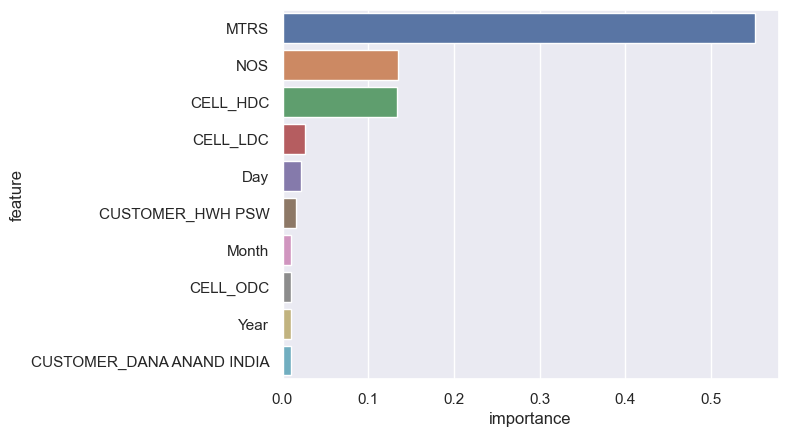

In [84]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [85]:
test_preds = sample1.predict(X_test)
test_preds

array([1.6381, 1.0297, 0.3962, ..., 9.7752, 1.8605, 1.7774])

In [86]:
sample1.fit(X_train, train_targets)

RandomForestRegressor(random_state=42)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [88]:
sample1.score(X_train, train_targets)*100

98.04455770354161

In [89]:
##CONCLUSION

Finally, Random Forest model demonstrates exceptional performance in predicting real-time dispatch output between 2020 and 2023, achieving a remarkable accuracy rate of 98%. This analysis provides valuable insights into operational dynamics and underscores the importance of leveraging data-driven approaches to optimize dispatch processes and enhance overall operational efficiency.